#Deep Learning

<p class='vspace'>Deep learning is a type of machine learning with a multi-layered neural network. It is one of many machine learning methods for synthesizing data into a predictive form.
</p>
<div class='vspace'></div><div><img width='350px' src='http://apmonitor.com/do/uploads/Main/ai_overview.png' alt='' title='' /></div>
<p class='vspace'>Two applications of deep learning are regression (predict outcome) and classification (distinguish among discrete options). In each case, there is training data that is used to adjust weights (unknown parameters) that minimize a loss function (objective function).

This colab workbook is adapted from https://www.youtube.com/embed/zOCVTPb5DiM

</p>
<div class='vspace'></div>



<p class='vspace'>A trained model predicts outcomes based on new input conditions that aren't in the original data set. Some of the typical steps for building and deploying a deep learning application are data consolidation, data cleansing, model building, training, validation, and deployment. Example Python code is provided for each of the steps.
</p>
<div class='vspace'></div>

##Data Preparation
<ul><li>Consolidation - consolidation is the process of combining disparate data (Excel spreadsheet, PDF report, database, cloud storage) into a single repository.
</li><li>Data Cleansing - bad data should be removed and may include outliers, missing entries, failed sensors, or other types of missing or corrupted information.
</li><li>Inputs and Outputs - data is separated into inputs (explanatory variables) and outputs (supervisory signal). The inputs will be fed into a series of functions to produce an output prediction. The squared difference between the predicted output and the measured output is a typical loss (objective) function for fitting.  
</li><li>Scaling - scaling all data (inputs and outputs) to a range of 0-1 can improve the training process.
</li><li>Training and Validation - data is divided into training (e.g. 80%) and validation (e.g. 20%) sets so that the model fit can be evaluated independently of the training. Cross-validation is an approach to divide the training data into multiple sets that are fit separately. The parameter consistency is compared between the multiple models.
</li></ul><div class='vspace'></div>
<video controls autoplay loop>
  <source src="/do/uploads/Main/keras_tutorial.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video> 


###1. Data Export with Numpy / Import with Pandas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt  

# generate training data
x = np.linspace(0.0,2*np.pi,20)
y = np.sin(x)
# save training data to file
data = np.vstack((x,y)).T
np.savetxt('train_data.csv',data,header='x,y',comments='',delimiter=',')

# generate test data
x = np.linspace(0.0,2*np.pi,100)
y = np.sin(x)
# save test data to file
data = np.vstack((x,y)).T
np.savetxt('test_data.csv',data,header='x,y',comments='',delimiter=',')


###2. Data Scaling with scikit-learn

In [ ]:
# load training and test data with pandas
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# scale values to 0 to 1 for the ANN to work well
s = MinMaxScaler(feature_range=(0,1))

# scale training and test data
sc_train = s.fit_transform(train_df)
sc_test = s.transform(test_df)

# print scaling adjustments
print('Scalar multipliers')
print(s.scale_)
print('Scalar minimum')
print(s.min_)

# convert scaled values back to dataframe
sc_train_df = pd.DataFrame(sc_train, columns=train_df.columns.values)
sc_test_df = pd.DataFrame(sc_test, columns=test_df.columns.values)

# save scaled values to CSV files
sc_train_df.to_csv('train_scaled.csv', index=False)
sc_test_df.to_csv('test_scaled.csv', index=False)


Scalar multipliers
[0.15915494 0.50171361]
Scalar minimum
[0.  0.5]


##Model Build


<p>An artificial neural network relates inputs to outputs with layers of nodes. There nodes are also called neurons because they emulate the learning process that occurs in the brain where the connection strength is adjusted to change the learned outcome.
</p>
<div class='vspace'></div><div><img width='300px' src='http://apmonitor.com/do/uploads/Main/neural_network.png' alt='' title='' /></div>
<p class='vspace'>Instead of just one layer, deep learning uses a multi-layered neural network. This neural network may have linear or nonlinear layers. The layer form is determined by the type of activation function (e.g. linear, rectified linear unit (ReLU), hyperbolic tangent) that transforms each intermediate input to the next layer.
</p>
<div class='vspace'></div><div><img width='550px' src='http://apmonitor.com/do/uploads/Main/deep_neural_network.png' alt='' title='' /></div>
<p class='vspace'>Linear layers at the beginning and end are common. Increasing the number of layers can improve the fit but also requires more computational power for training and may cause the model to be over-parameterized and decrease the predictive capability.
</p>

###3. Model Build and Train with Keras

<p>A loss function (objective function) is minimized by adjusting the weights (unknown parameters) of the multi-layered neural network. An epoch is a full training cycle and is one iteration of the learning algorithm. A decrease in the loss function is monitored to ensure that the number of epochs is sufficient to refine the predictions without over-fitting to data irregularities such as random fluctuations.
</p>

In [ ]:
# create neural network model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.add(Dense(2, activation='linear'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")

# load training data
train_df = pd.read_csv("train_scaled.csv")
X1 = train_df.drop('y', axis=1).values
Y1 = train_df[['y']].values

# train the model
model.fit(X1,Y1,epochs=5000,verbose=0,shuffle=True)

# Save the model to hard drive
#model.save('model.h5')

###4. Model Validation with Keras


<p>The validation test set assesses the ability of the neural network to predict based on new conditions that were not part of the training set. Parity plots are one of many graphical methods to assess the fit. Mean squared error (MSE) or the R<sup>2</sup> value are common quantitative measures of the fit.
</p>


In [ ]:
# Load the model from hard drive
#model.load('model.h5')

# load test data
test_df = pd.read_csv("test_scaled.csv")
X2 = test_df.drop('y', axis=1).values
Y2 = test_df[['y']].values

# test the model
mse = model.evaluate(X2,Y2, verbose=1)

print('Mean Squared Error: ', mse)

4/4 [==============================] - 0s 3ms/step - loss: 2.4160e-04
Mean Squared Error:  0.00024159756139852107


###5. Model Predictions with Keras



4/4 [==============================] - 0s 3ms/step


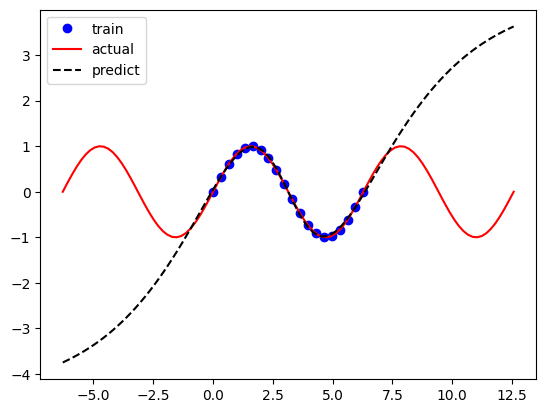

In [ ]:
# generate prediction data
x = np.linspace(-2*np.pi,4*np.pi,100)
y = np.sin(x)
# scale input
X3 = x*s.scale_[0]+s.min_[0]
# predict
Y3P = model.predict(X3)
# unscale output
yp = (Y3P-s.min_[1])/s.scale_[1]

plt.figure()
plt.plot((X1-s.min_[0])/s.scale_[0], \
                 (Y1-s.min_[1])/s.scale_[1], \
                 'bo',label='train')
plt.plot(x,y,'r-',label='actual')
plt.plot(x,yp,'k--',label='predict')
plt.legend(loc='best')
plt.savefig('results.png')
plt.show()